In [1]:
%load_ext autoreload
# %autoreload 2

# Ejercicio 1

In [21]:
# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime
import os

logging.basicConfig(
    level=logging.INFO,
    format=f"[%(asctime)s][%(levelname)s][{os.environ.get('USERNAME')}] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

[02-02 12:06:42][INFO][pc] 2026-02-02 12:06:42.258093


In [52]:
%autoreload 2
from src import gauss_jacobi, gauss_seidel
A = [[2,1],[3,2]]
b = [5,8]

In [54]:
# ####################################################################
def gauss_jacobi(
    *, A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new.copy()
        logging.info(f"i= {k} x: {x_new.T}")

    return x

In [18]:
gauss_jacobi(A=A, b=b, x=np.zeros(len(b)), tol=1e-5, max_iter=50)

[02-02 12:05:38][INFO][pc] i= 0 x: [0. 0.]
[02-02 12:05:38][INFO][pc] i= 1 x: [[2.5 4. ]]
[02-02 12:05:38][INFO][pc] i= 2 x: [[0.5  0.25]]
[02-02 12:05:38][INFO][pc] i= 3 x: [[2.375 3.25 ]]
[02-02 12:05:38][INFO][pc] i= 4 x: [[0.875  0.4375]]
[02-02 12:05:38][INFO][pc] i= 5 x: [[2.28125 2.6875 ]]
[02-02 12:05:38][INFO][pc] i= 6 x: [[1.15625  0.578125]]
[02-02 12:05:38][INFO][pc] i= 7 x: [[2.2109375 2.265625 ]]
[02-02 12:05:38][INFO][pc] i= 8 x: [[1.3671875  0.68359375]]
[02-02 12:05:38][INFO][pc] i= 9 x: [[2.15820312 1.94921875]]
[02-02 12:05:38][INFO][pc] i= 10 x: [[1.52539062 0.76269531]]
[02-02 12:05:38][INFO][pc] i= 11 x: [[2.11865234 1.71191406]]
[02-02 12:05:38][INFO][pc] i= 12 x: [[1.64404297 0.82202148]]
[02-02 12:05:38][INFO][pc] i= 13 x: [[2.08898926 1.53393555]]
[02-02 12:05:38][INFO][pc] i= 14 x: [[1.73303223 0.86651611]]
[02-02 12:05:38][INFO][pc] i= 15 x: [[2.06674194 1.40045166]]
[02-02 12:05:38][INFO][pc] i= 16 x: [[1.79977417 0.89988708]]
[02-02 12:05:38][INFO][pc] i= 

array([[1.99849491],
       [0.99924746]])

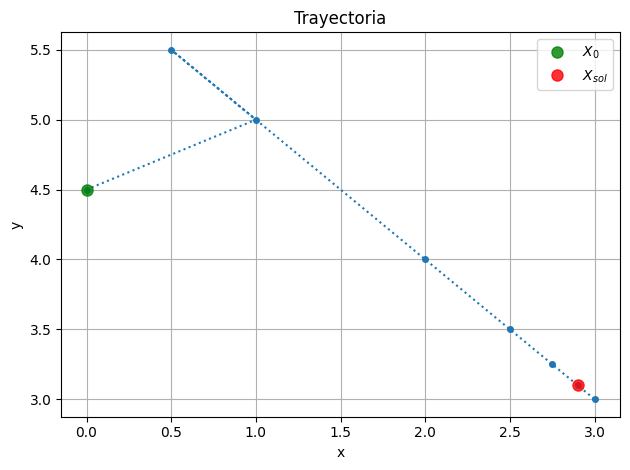

In [44]:
# Extraer valores de la trayectoria
# -- Datos de ejemplo --
x_values = [0, 1, 0.5, 2, 2.5, 2.75, 2.9, 3.0]
y_values = [4.5, 5, 5.5, 4, 3.5, 3.25, 3.1, 3.0]

import matplotlib.pyplot as plt

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "go", markersize=8, label="$X_{0}$", alpha=0.8)
plt.plot(x_values[-2], y_values[-2], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Ejercicio 2

In [46]:
%autoreload 2
from src import gauss_jacobi, gauss_seidel
A = [[1,1],[-2,1]]
b = [6,0]

In [49]:
# ####################################################################
def gauss_jacobi(
    *, A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new.copy()
        logging.info(f"i= {k} x: {x_new.T}")

    return x

In [50]:
gauss_jacobi(A=A, b=b, x=np.zeros(len(b)), tol=1e-5, max_iter=10)

[02-02 12:28:39][INFO][pc] i= 0 x: [0. 0.]
[02-02 12:28:39][INFO][pc] i= 1 x: [[6. 0.]]
[02-02 12:28:39][INFO][pc] i= 2 x: [[ 6. 12.]]
[02-02 12:28:39][INFO][pc] i= 3 x: [[-6. 12.]]
[02-02 12:28:39][INFO][pc] i= 4 x: [[ -6. -12.]]
[02-02 12:28:39][INFO][pc] i= 5 x: [[ 18. -12.]]
[02-02 12:28:39][INFO][pc] i= 6 x: [[18. 36.]]
[02-02 12:28:39][INFO][pc] i= 7 x: [[-30.  36.]]
[02-02 12:28:39][INFO][pc] i= 8 x: [[-30. -60.]]
[02-02 12:28:39][INFO][pc] i= 9 x: [[ 66. -60.]]
[02-02 12:28:39][INFO][pc] i= 10 x: [[ 66. 132.]]


array([[ 66.],
       [132.]])

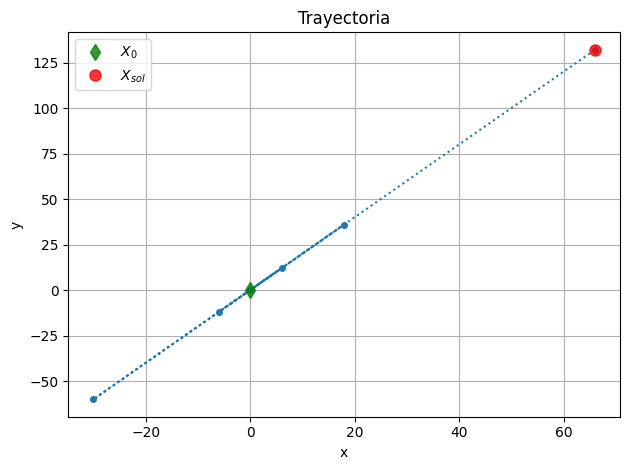

In [51]:
# Extraer valores de la trayectoria
# -- Datos de ejemplo --
x_values = [0, 6, -6, 18, -30, 66]
y_values = [0, 12, -12, 36, -60, 132]

import matplotlib.pyplot as plt

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(x_values[-1], y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Código para dibujar

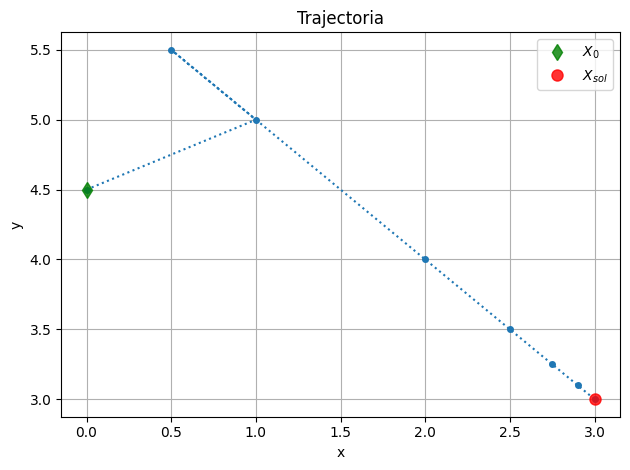

In [ ]:
# Extraer valores de la trayectoria
# -- Datos de ejemplo --
x_values = [0, 1, 0.5, 2, 2.5, 2.75, 2.9, 3.0]
y_values = [4.5, 5, 5.5, 4, 3.5, 3.25, 3.1, 3.0]

import matplotlib.pyplot as plt

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(x_values[-1], y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()